In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train_original = train.copy()

test = pd.read_csv('test.csv')
test_original = test.copy()

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Univariate Analysis

C:\Users\Swapnil Kumar Vaish\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


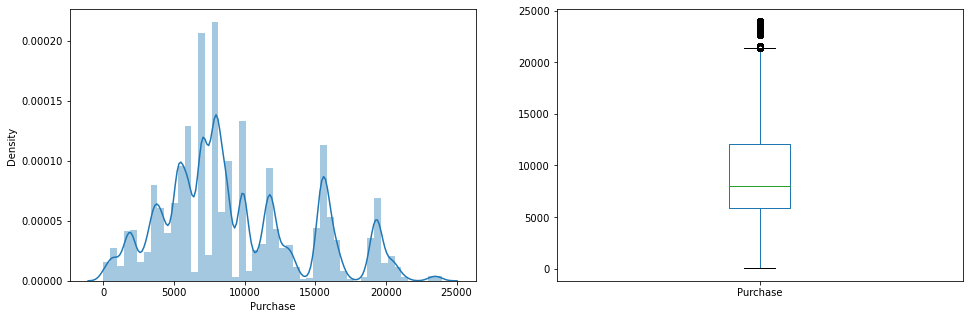

In [7]:
#Target :: Purchase
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Purchase'])    

plt.subplot(122)
train['Purchase'].plot.box(figsize = (16,5))

plt.show()

C:\Users\Swapnil Kumar Vaish\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


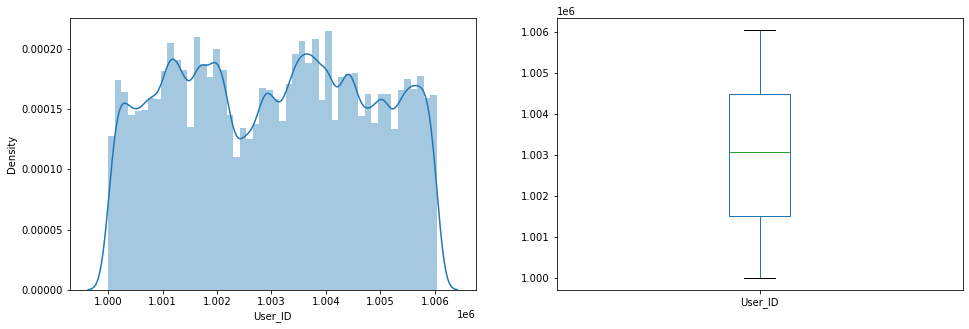

In [26]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['User_ID'])    

plt.subplot(122)
train['User_ID'].plot.box(figsize = (16,5))

plt.show()

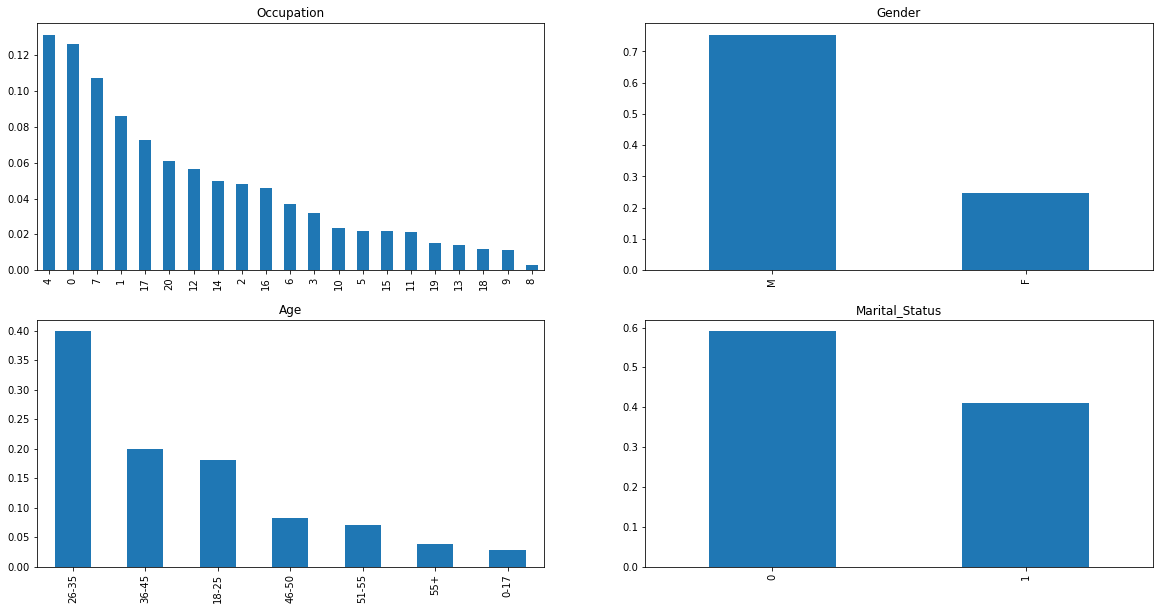

In [21]:
plt.figure(1)

plt.subplot(221)
train['Occupation'].value_counts(normalize=True).plot.bar(figsize = (30,20), title="Occupation")

plt.subplot(222)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="Gender")

plt.subplot(223)
train['Age'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="Age")

plt.subplot(224)
train['Marital_Status'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="Marital_Status")


plt.show()

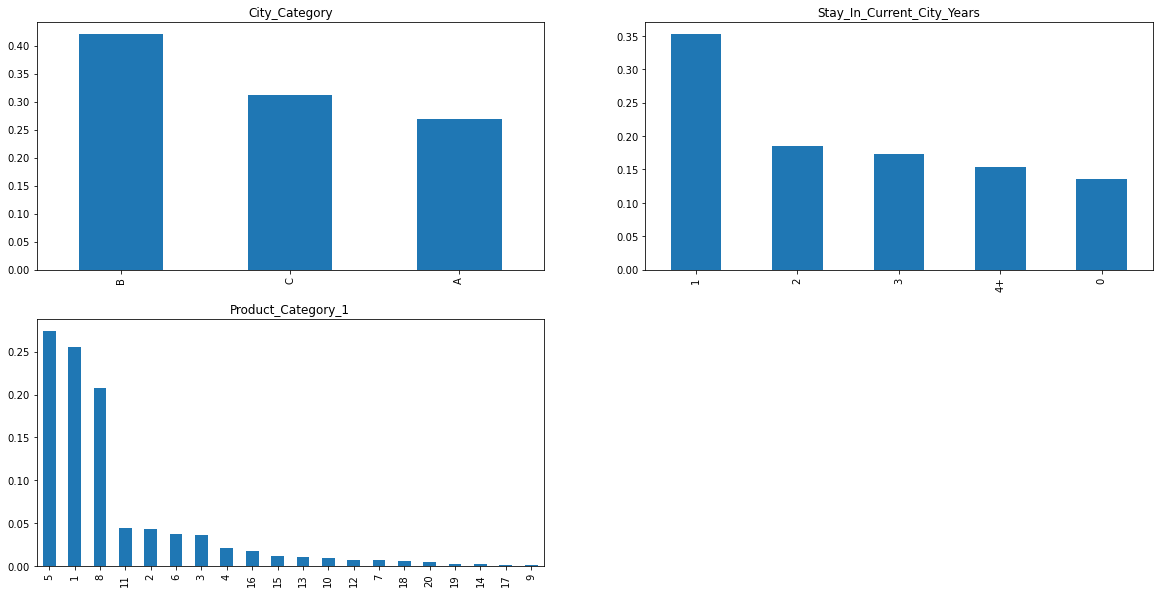

In [22]:
plt.figure(1)

plt.subplot(221)
train['City_Category'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="City_Category")

plt.subplot(222)
train['Stay_In_Current_City_Years'].value_counts(normalize=True).plot.bar(title="Stay_In_Current_City_Years")

plt.subplot(223)
train['Product_Category_1'].value_counts(normalize=True).plot.bar(title="Product_Category_1")

plt.show()

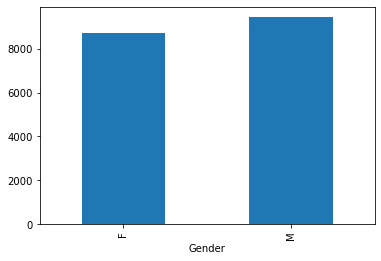

In [28]:
train.groupby('Gender')['Purchase'].mean().plot.bar()

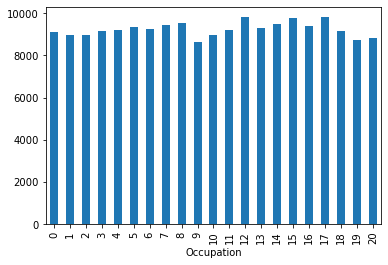

In [29]:
train.groupby('Occupation')['Purchase'].mean().plot.bar()

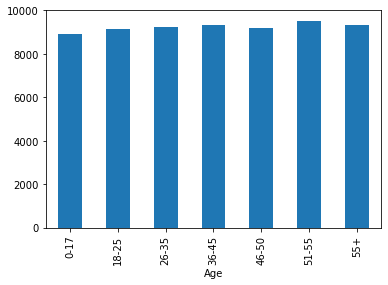

In [30]:
train.groupby('Age')['Purchase'].mean().plot.bar()

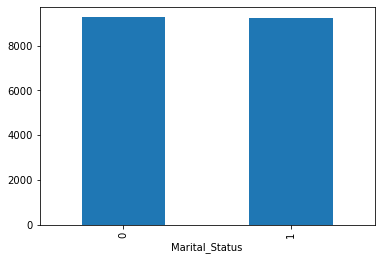

In [31]:
train.groupby('Marital_Status')['Purchase'].mean().plot.bar()

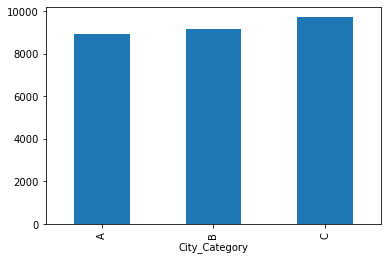

In [32]:
train.groupby('City_Category')['Purchase'].mean().plot.bar()

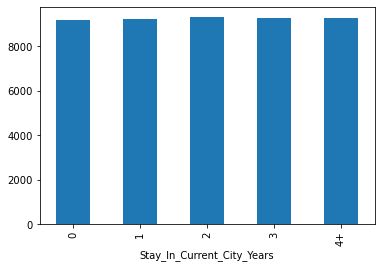

In [33]:
train.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot.bar()

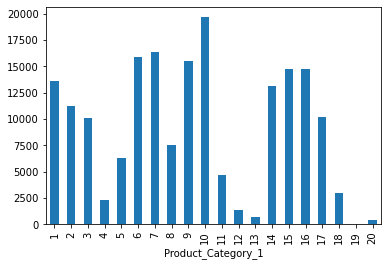

In [34]:
train.groupby('Product_Category_1')['Purchase'].mean().plot.bar()

In [ ]:
Gender= pd.crosstab(train['Gender'],train['Purchase'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

In [13]:
len(pd.unique(train['Product_ID']))

3631

In [15]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
train["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00077542       1
P00185942       1
P00060842       1
P00074742       1
P00307242       1
Name: Product_ID, Length: 3631, dtype: int64

In [4]:
test = test.drop(['User_ID'],axis=1)
test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
test.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64